In [16]:
# Linear algebra
import numpy as np 
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Customers segmentation

**Las Wagones** is a company selling IT equipment , from small consumable items to large printers. Las Wagones has identified 4 customers segments noted _A, B, C and D_. These segments have been identified by the Sales department based on a study of the historical buying behavior of the customers. The Marketing department is very interested in understanding who are the customers inside these segments at an early stage. They ordered you for a study. This study aims at understanding what are these 4 segments.

In [1]:
# Load the nbresult package to be able to save your results 
from nbresult import ChallengeResult

## Data collection (9.5%)

### Loading data from the database

Download the `customers.sqlite` database from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.sqlite) and store it inside the `db` folder:

In [2]:
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.sqlite >> db/customers.sqlite

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  608k  100  608k    0     0   797k      0 --:--:-- --:--:-- --:--:--  796k


#### Database schema

**📝 Open the `db/customers.sqlite` from your favorite SQL client and draw the database schema on the [schema editor](https://kitt.lewagon.com/db) on Kitt. Save the schema as `customers.xml` in the `db` folder.**

#### Querying the data

We want to get the following information about **all** the 8068 customers from the database:
- `id`: the unique identifier of the customer
- `gender`: customer's gender
- `married`: whether or not the customer has ever been married
- `age`: customer's age
- `graduated`: whether or not the customer has a degree
- `score`: customer's spending score (first order)
- `family_size`: the number of members of the customer's family, including the customer
- `profession`: customer's profession
- `work_experience`: customer's work experience in years
- `segment`: the segment the customer belongs to

**📝 Write the SQL query you need to fetch the data. Save it as a `str` in the `query` variable.**

In [3]:
query = '''
SELECT c.id
       ,c.gender
       ,c.married
       ,c.age
       ,c.graduated
       ,c.score
       ,COUNT(r.id) + 1 AS family_size
       ,p.category AS profession
       ,e.duration AS work_experience
       ,c.segment
FROM customers c
LEFT JOIN relatives r ON r.customer_id  = c.id 
LEFT JOIN experiences e ON e.customer_id = c.id 
LEFT JOIN professions p ON p.id = e.profession_id
GROUP BY c.id
'''

**📝 Connect to the database, execute the query and store the results into a `DataFrame` named `data`. Display the 10 first rows and the shape of the dataset.**

In [5]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('db/customers.sqlite')
c = conn.cursor()

# Execute the query
c.execute(query)
rows = c.fetchall()

# Store results in a DataFrame named data
df_columns = ["id"
       ,"gender"
       ,"married"
       ,"age"
       ,"graduated"
       ,"score"
       ,"family_size"
       ,"profession"
       ,"work_experience"
       ,"segment"]
data = pd.DataFrame(rows, columns=df_columns)

In [6]:
# Display the first 10 rows
data.head(10)

,id,gender,married,age,graduated,score,family_size,profession,work_experience,segment
0,1,Male,No,22,No,Low,4,Healthcare,1.0,D
1,2,Female,Yes,38,Yes,Average,3,Engineer,NaN,A
2,3,Female,Yes,67,Yes,Low,1,Engineer,1.0,B
3,4,Male,Yes,67,Yes,High,2,Lawyer,0.0,B
4,5,Female,Yes,40,Yes,High,6,Entertainment,NaN,A
5,6,Male,Yes,56,No,Average,2,Artist,0.0,C
6,7,Male,No,32,Yes,Low,3,Healthcare,1.0,C
7,8,Female,No,33,Yes,Low,3,Healthcare,1.0,D
8,9,Female,Yes,61,Yes,Low,3,Engineer,0.0,D
9,10,Female,Yes,55,Yes,Average,4,Artist,1.0,C


In [7]:
# Display the shape of the dataset
data.shape

(8068, 10)

#### 💾 Save your results

Run the following cell to save your results.

In [8]:
ChallengeResult('sql', query=query).write()

### Loading data from a CSV file

**📝 Load the data from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.csv) inside a `DataFrame` named `customers`.** 

Also, you can download the dataset into the `data` directory.

In [9]:
customers = pd.read_csv('data/customers.csv')
customers.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A


**💾 Save your results**

Run the following cell to save your results.

In [10]:
ChallengeResult('csv', data=customers).write()

## Data consulting challenge (33%)

### Data analysis & presentation

> Who are the customers composing the 4 segments? 

Based on the analysis of the `customers` dataset, prepare a slides deck to present your conclusions to the Marketing manager Debrah. The presentation must contain **5 slides maximum** (including the title slide). Feel free to choose the slide app of your choice.

ℹ️ Debrah is in fond of illustrations and statistics!

⚠️ Save your presentation in the current directory!

In [17]:
# Start your data analysis!
sns.set_theme()

#### Explore the dataset and remove null values

In [11]:
customers.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [12]:
# How many null values?
customers.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Segmentation         0
dtype: int64

In [13]:
# Remove null values and analyze if it alter the database stats
customers_clean = customers = customers.dropna()
customers_clean.describe()

,ID,Age,Work_Experience,Family_Size
count,6718.000000,6718.000000,6718.000000,6718.000000
mean,463516.571152,43.524263,2.629652,2.841768
std,2566.017254,16.513115,3.404639,1.523319
min,458982.000000,18.000000,0.000000,1.000000
25%,461347.250000,31.000000,0.000000,2.000000
50%,463566.000000,41.000000,1.000000,2.000000
75%,465739.750000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [18]:
# Removing the null values won't alter the stats so we can keep it clean
customers = customers_clean.copy()

#### Explore target: Segmentation

In [24]:
len(customers)

6718

<AxesSubplot:xlabel='Segmentation', ylabel='count'>

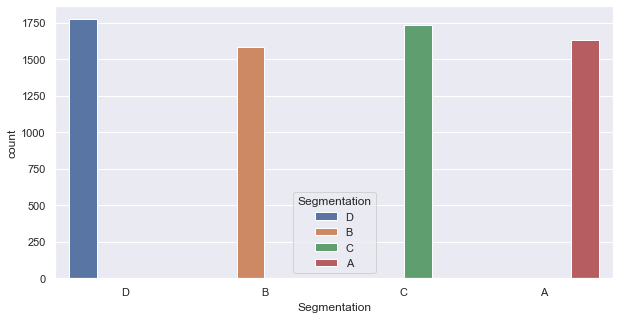

In [25]:
# How many customers in each Segments
plt.figure(figsize=(10,5))
sns.countplot(customers.Segmentation, hue=customers.Segmentation)

They look pretty well balanced

#### Explore each feature

##### Categorical features

<AxesSubplot:xlabel='Segmentation', ylabel='count'>

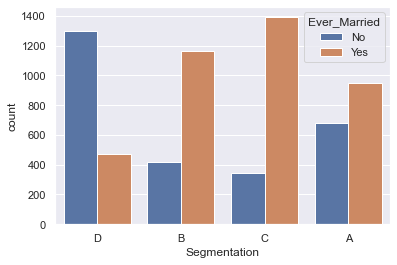

In [26]:
# Ever_Married
sns.countplot(customers.Segmentation, hue=customers.Ever_Married)

--> D seems highly correlated with not ever_married, compared to others

<AxesSubplot:xlabel='Segmentation', ylabel='count'>

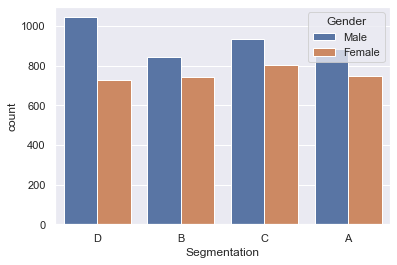

In [27]:
# Gender
sns.countplot(customers.Segmentation, hue=customers.Gender)

--> All segments have more males than females so gender is not highly correlated with segmentation

<AxesSubplot:xlabel='Segmentation', ylabel='count'>

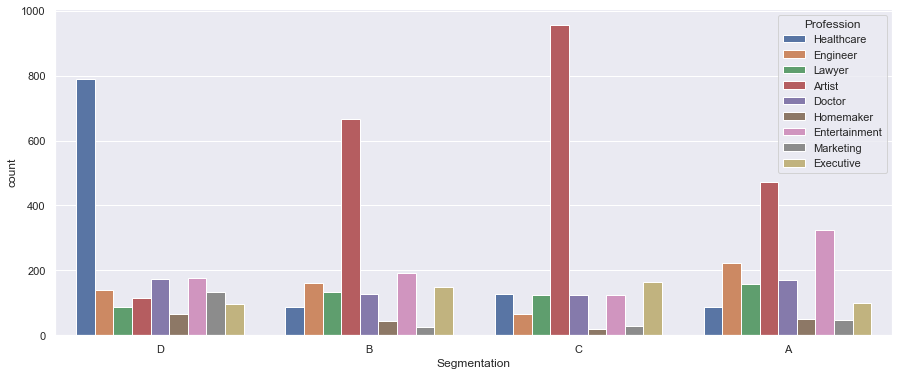

In [28]:
# Profession
plt.figure(figsize=(15,6))
sns.countplot(customers.Segmentation, hue=customers.Profession)

--> D highly correlated with Healthcare profession

<AxesSubplot:xlabel='Segmentation', ylabel='count'>

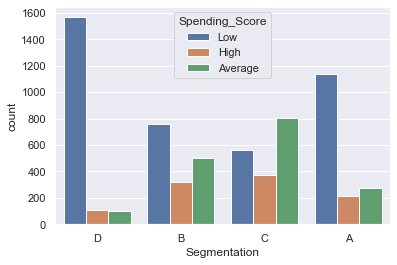

In [29]:
# Explore Spending Score for each Segment
sns.countplot(customers.Segmentation, hue=customers.Spending_Score)

--> D is negatively correlated with high and average spending score

##### Numerical features

<AxesSubplot:xlabel='Segmentation', ylabel='count'>

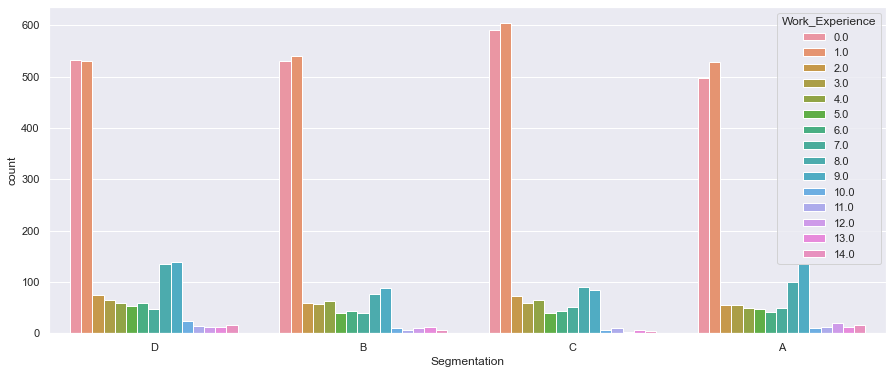

In [30]:
# Explore Work Experience for each Segment
plt.figure(figsize=(15,6))
sns.countplot(customers.Segmentation, hue=customers.Work_Experience)

<AxesSubplot:xlabel='Segmentation', ylabel='count'>

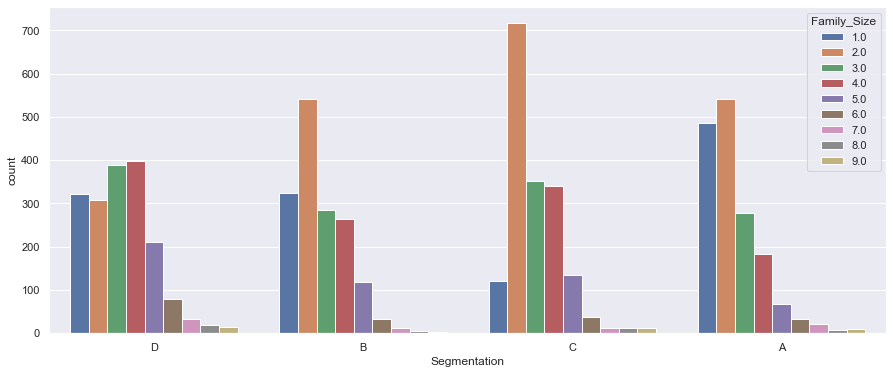

In [31]:
# Explore Family Size for each Segment
plt.figure(figsize=(15,6))
sns.countplot(customers.Segmentation, hue=customers.Family_Size)

<AxesSubplot:xlabel='Family_Size'>

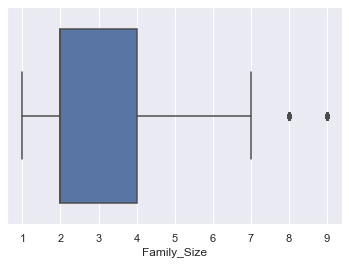

In [32]:
# Create bins for Family Size: Let's explore the distribution first
sns.boxplot(customers.Family_Size)

In [33]:
# Create bins
customers['Family_Size_binned'] = pd.cut(x= customers['Family_Size'],
                       bins=[0,2,3,5,10], 
                       labels=["fam_1","fam_2","fam_34","fam_5+"])

<AxesSubplot:xlabel='Segmentation', ylabel='count'>

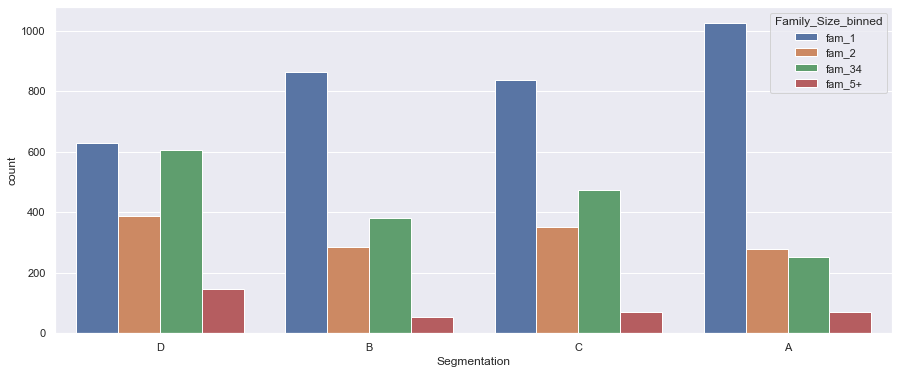

In [34]:
# Explore Binned Family Size for each Segment
plt.figure(figsize=(15,6))
sns.countplot(customers.Segmentation, hue=customers.Family_Size_binned)

<AxesSubplot:xlabel='Age'>

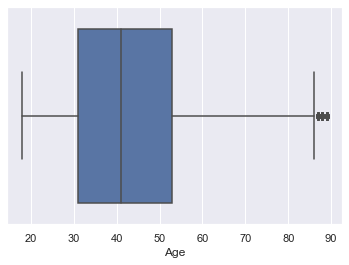

In [35]:
# Age per Segment
sns.boxplot(customers["Age"], hue = [])

<AxesSubplot:xlabel='Spending_Score', ylabel='count'>

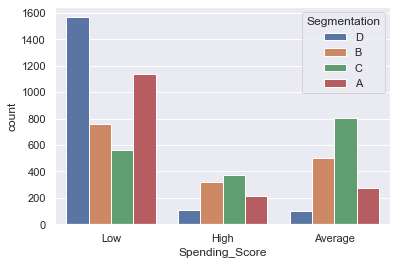

In [36]:
sns.countplot(customers.Spending_Score, hue=customers.Segmentation)

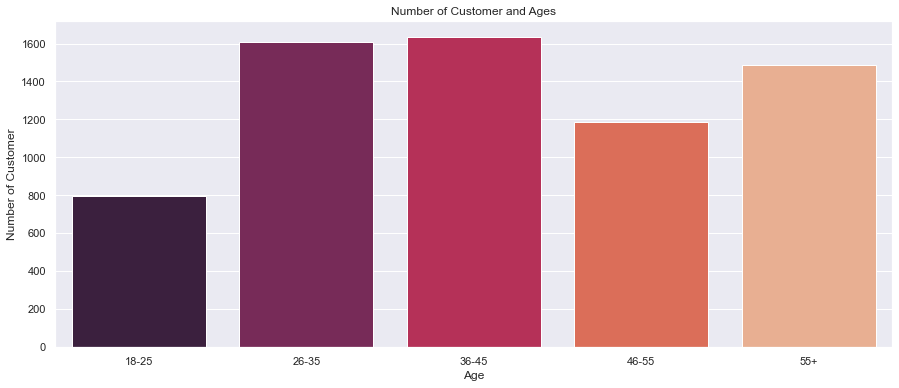

In [37]:
age18_25 = customers.Age[(customers.Age <= 25) & (customers.Age >= 18)]
age26_35 = customers.Age[(customers.Age <= 35) & (customers.Age >= 26)]
age36_45 = customers.Age[(customers.Age <= 45) & (customers.Age >= 36)]
age46_55 = customers.Age[(customers.Age <= 55) & (customers.Age >= 46)]
age55above = customers.Age[customers.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

In [ ]:
sns.catplot(data=customers, x="Segmentation", y="Age")

### Segmentation relevance

Debrah has a doubt about the number of customers segments designed by the Sales department. Base on an empirical method, the elbow method, and a clustering approach **can you tell her if it is an optimal segmentation or not?**

Store the optimal number of segments inside the `n_clusters` variable.

In [ ]:
# ENCODE CATEGORICAL FEATURES
customers_dummies = customers.drop(columns='Segmentation')
df = pd.get_dummies(customers_dummies, prefix=['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score'])
df.head()

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr())

In [ ]:
from sklearn.cluster import KMeans 

inertias = []
ks = range(1,10)
for k in ks:
    km_test = KMeans(n_clusters=k).fit(df)
    inertias.append(km_test.inertia_)
plt.plot(ks, inertias)
plt.xlabel('k cluster number')

In [ ]:
km = KMeans(n_clusters=2)
km.fit(df)
km.cluster_centers_

In [ ]:
n_clusters = 2

**💾 Save your results**

Run the following cell to save your results.

In [ ]:
ChallengeResult('clusters', n_clusters=n_clusters).write()

### Segment D statistics

In addition the marketing team is really interested in the **segment D** so you will have to answer some questions about it. 

To do so, we are considering a binary segmentation: **D vs the rest**. Download the `customers_encoded.csv` dataset from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers_encoded.csv) and store it into the `data` folder.

#### Loading data

In [ ]:
# Load the data and display the first rows
customers_encoded = pd.read_csv('data/customers_encoded.csv')
customers_encoded.head()

After loading the data you can see a new column `is_D` which take the value `1` if the customer belongs to the segment D, `0` otherwise.

#### Age analysis of segment D

❓ Using a statistical test, show than customers from segment D are **statistically younger** than the whole customers. 

Store the $p-value$ of your test inside a `p_value` variable.

In [ ]:
# Average age
average_age = customers_encoded.Age.mean()
average_age

In [ ]:
# Average age of D customers
d_average_age = customers_encoded[customers_encoded['is_D']==1].Age.mean()
d_average_age

In [ ]:
# Standard Deviation of age
import numpy as np
std_age = np.std(customers_encoded.Age)
std_age

In [ ]:
# Number of D customers
len_d_customers = sum(customers_encoded['is_D'])
len_d_customers

In [ ]:
# Create a null hypothesis
H0 = "D customers are NOT statistically younger (=older) than 43,5 years old"
H1 = "D customers are  statistically younger than 43,5 years old"

In [ ]:
# Test
from scipy.stats import norm
X = norm(average_age,std_age/(len_d_customers**0.5))
X

In [ ]:
# p_value
p_value = X.cdf(d_average_age)
p_value

P-Value is inferior to 5% so we can reject the null hypothesis and conclude that D customers are  statistically younger than the whole customers

#### Segment D odds analysis

❓ What are the **odds** for a customer to be in the segment D?

Store the result inside a `odds` variable.

In [ ]:
# odds
odds = customers_encoded.is_D.mean()
odds

❓ Considering a **married and graduated** customer, how are the odds of being part of segment D **multiplied** while **increasing** the age by 1 year?

Store the result inside a `odds_variation` variable.

In [ ]:
# Filter by married & graduated
married = customers_encoded[customers_encoded['Ever_Married']=='Yes']
married_and_graduated = married[married['Graduated']=='Yes']
d_married_and_graduated = married_and_graduated[married_and_graduated['is_D']==1]

In [ ]:
import statsmodels.formula.api as smf
model = smf.logit(formula='is_D ~ Age', data=married_and_graduated).fit()
model.params

--> **Increasing age by 1 year decreases the log odds of being a customer D by 0.02**

In [ ]:
# --> Taking the exponential
np.exp(-0.023062)

--> **Increasing age by 1 year multiplies the odds of being a customer D by 0.9772018953775428**

In [ ]:
odds_variation=0.9772018953775428

####  💾 Save your results

Run the following cell to save your results.

In [ ]:
ChallengeResult('segment_d', p_value=p_value, odds=odds, gap=odds_variation).write()

**⚠️ Save your notebook then commit and push your code on GitHub**